In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<Figure size 500x400 with 0 Axes>

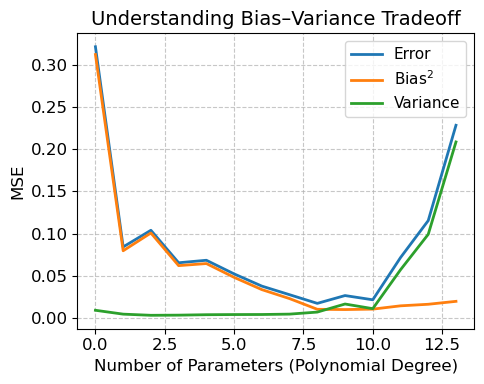

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)
plt.rcParams.update({
    "font.size": 12   # match LaTeX text size (10, 11, or 12pt depending on your doc class)
})

plt.figure(figsize=(5,4)) 


n = 40
n_boostraps = 100
maxdegree = 14

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis=1, keepdims=True))

# ---- Plot ----
plt.figure(figsize=(5,4))
plt.plot(polydegree, error, label='Error', linewidth=2)
plt.plot(polydegree, bias, label='Bias$^2$', linewidth=2)
plt.plot(polydegree, variance, label='Variance', linewidth=2)

plt.xlabel("Number of Parameters (Polynomial Degree)", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("Understanding Bias–Variance Tradeoff", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("bias_variance.png", dpi=300)  # High-res for Overleaf
plt.show()


In [2]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

In [3]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.ones((n, p+1))  # include intercept column
        for i in range(1, p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p+1):
            X[:, i-1] = x**i
    return X

In [4]:
def Ridge_parameters(X, y, lam):
    n, p = X.shape
    I = np.eye(p)
    return np.linalg.inv(X.T @ X + lam*I) @ X.T @ y

NameError: name 'X_train_s' is not defined

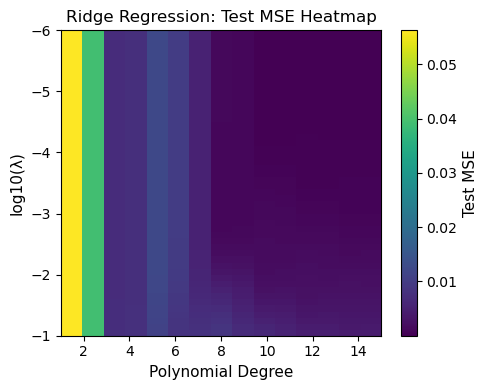

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- your code for polynomial_features and Ridge_parameters must be defined earlier ---

# Grid
degrees = range(1, 16)              # degrees 1 → 15
lams = np.logspace(-1, -6, 50)      # 50 λ values between 10^-1 and 10^-6


# Rows = lambdas, cols = degrees
MSE_grid = np.zeros((len(lams), len(degrees)))

for j, d in enumerate(degrees):
    X = polynomial_features(x, d)  # no intercept
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)

    y_offset  = y_train.mean()
    y_train_c = y_train - y_offset

    for i, lam in enumerate(lams):
        beta = Ridge_parameters(X_train_s, y_train_c, lam)
        y_pred = X_test_s @ beta + y_offset
        MSE_grid[i, j] = np.mean((y_test - y_pred) ** 2)

# --- Heatmap ---
plt.figure(figsize=(5,4))
im = plt.imshow(MSE_grid, aspect='auto', origin='lower',
                extent=[min(degrees), max(degrees), np.log10(lams[0]), np.log10(lams[-1])],
                cmap="viridis")

cbar = plt.colorbar(im)
cbar.set_label("Test MSE", fontsize=11)

plt.xlabel("Polynomial Degree", fontsize=11)
plt.ylabel("log10(λ)", fontsize=11)
plt.title("Ridge Regression: Test MSE Heatmap", fontsize=12)

plt.tight_layout()
plt.savefig("ridge_heatmap.png", dpi=300)
plt.show()
